In [57]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("final_food_delivery_dataset.csv")
print(df.shape)
print(df.columns)
df.head()

(10000, 13)
Index(['Unnamed: 0', 'order_id', 'user_id', 'restaurant_id', 'order_date',
       'total_amount', 'restaurant_name_x', 'name', 'city', 'membership',
       'restaurant_name_y', 'cuisine', 'rating'],
      dtype='object')


,Unnamed: 0,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [58]:
# Removed unwanted and duplicate columns
df.drop(columns=["Unnamed: 0","restaurant_name_x"],inplace=True)
# rename
df = df.rename(columns={"restaurant_name_y":"restaurant_name"})


In [59]:
#Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"],format="%d-%m-%Y")
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,name,city,membership,restaurant_name,cuisine,rating
0,1,2508,450,2023-02-18,842.97,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


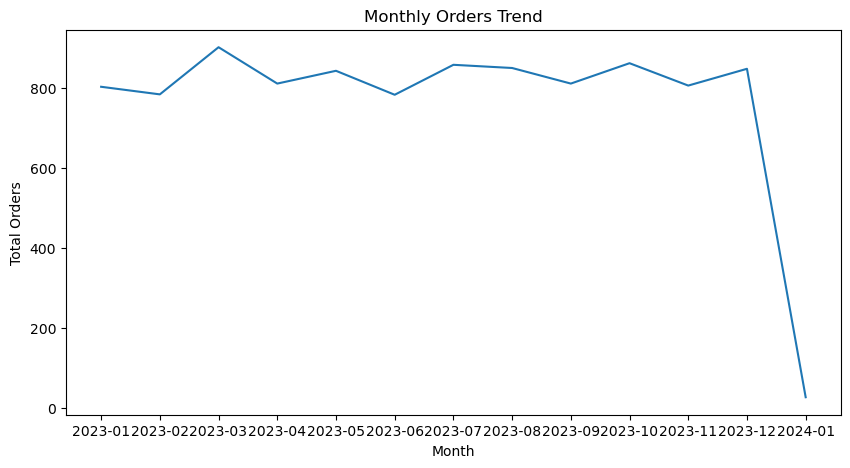

In [60]:
# 1. Order trends over time
monthly_orders = df.groupby(df["order_date"].dt.to_period("M")).size()

plt.figure(figsize=(10,5))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.title("Monthly Orders Trend")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.show()


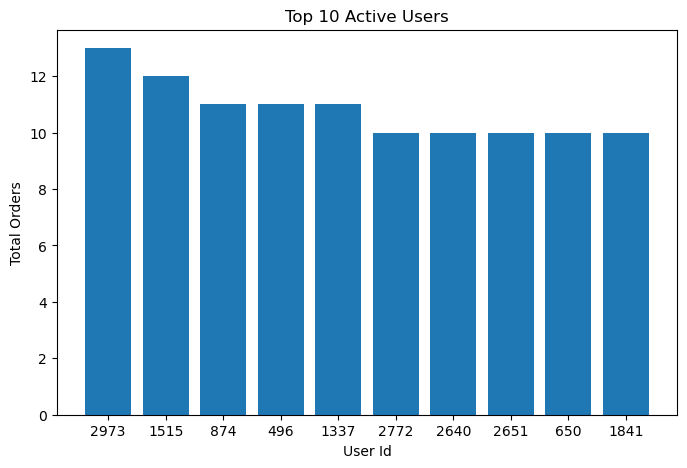

In [61]:
# 2.User behavior patterns
top_users = df["user_id"].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(top_users.index.astype(str),top_users.values)
plt.title("Top 10 Active Users")
plt.xlabel("User Id")
plt.ylabel("Total Orders")
plt.show()

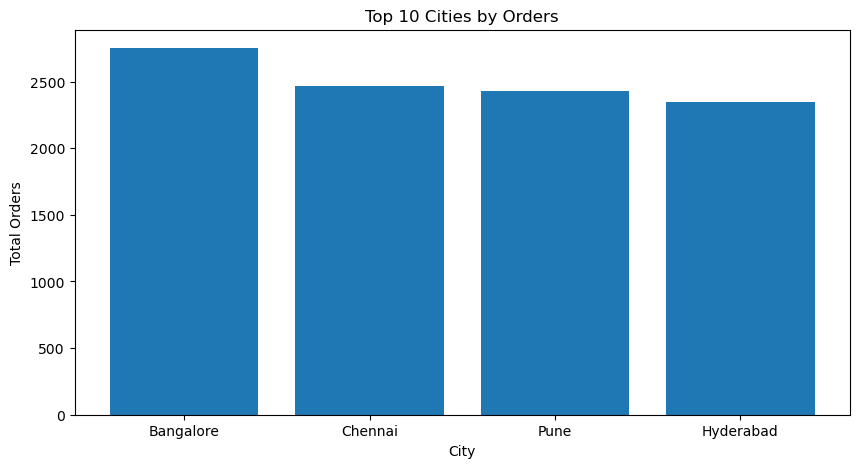

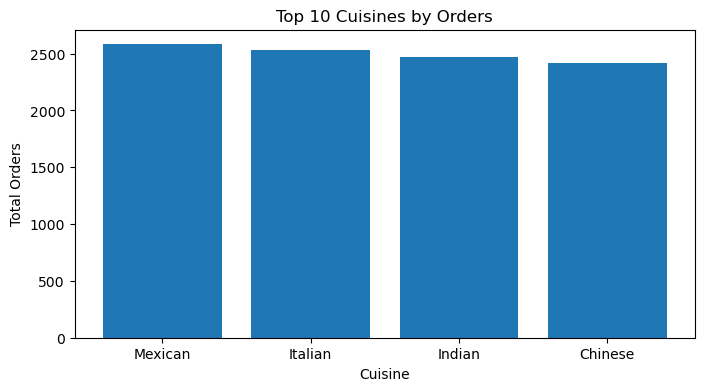

In [70]:
# 3. City-wise and cuisine-wise performance
# City-wise performance 
top_cities = df["city"].value_counts().head(100)

plt.figure(figsize=(10,5))
plt.bar(top_cities.index,top_cities.values)
plt.title("Top 10 Cities by Orders")
plt.xlabel("City")
plt.ylabel("Total Orders")
plt.show()

# Cuisine-wise performance
top_cuisines = df["cuisine"].value_counts().head(10)
plt.figure(figsize=(8,4))
plt.bar(top_cuisines.index,top_cuisines.values)
plt.title("Top 10 Cuisines by Orders")
plt.xlabel("Cuisine")
plt.ylabel("Total Orders")
plt.show()

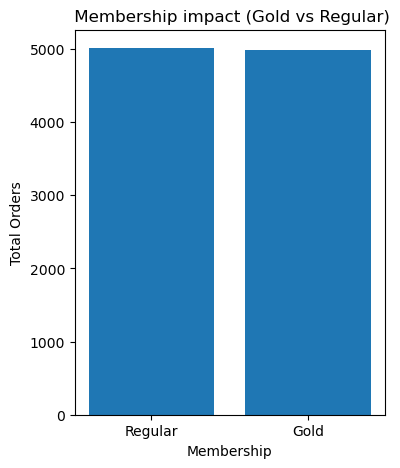

In [63]:
# 4. Membership impact (Gold vs Regular)
membership = df["membership"].value_counts()
plt.figure(figsize=(4,5))
plt.bar(membership.index,membership.values)
# plt.bar(membership.index,df["city"].index.astype(str))
plt.title(" Membership impact (Gold vs Regular)")
plt.xlabel("Membership")
plt.ylabel("Total Orders")
plt.show()

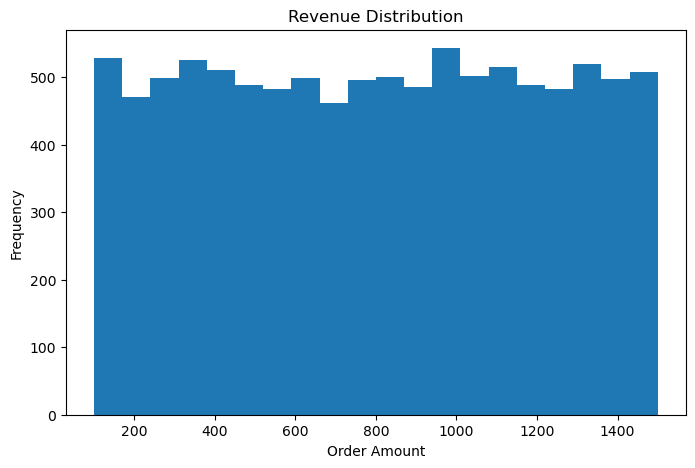

In [64]:
# 5. Revenue distribution and seasonality
plt.figure(figsize=(8,5))
plt.hist(df["total_amount"], bins=20)
plt.title("Revenue Distribution")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()
